In [ ]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

m = 100
n = 100
matrix = np.random.normal(0,1,m*n).reshape(m,n)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in range(0,100):
    ax.clear()
    ax.plot(matrix[i,:])
    fig.canvas.draw()

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from random import randrange
from threading import Thread
import time
import serial


class LiveGraph:
    def __init__(self):
        self.ser = serial.Serial(port='/dev/cu.usbserial-110',
                                 baudrate=115200,
                                 parity=serial.PARITY_ODD,
                                 stopbits=serial.STOPBITS_TWO,
                                 bytesize=serial.SEVENBITS,
                                 timeout=2
                                )
        wait = True
        while wait:
            out = self.ser.readline()
            if out == b'LOOP\r\n':
                print("[i] device is ready!")
                wait = False
        self.x_data, self.y_data = [i for i in range(128)], ['0' for i in range(128)]
        self.figure = plt.figure()
        self.line, = plt.plot(self.x_data, self.y_data)
        self.animation = FuncAnimation(self.figure, self.update, 
                                       interval=1000, cache_frame_data=False)
        self.th = Thread(target=self.thread_f, daemon=True)
        self.th.start()

    def __exit__(self, exc_type, exc_value, traceback):
        self.ser.close()

    def update(self, frame):
        self.line.set_data(self.x_data, self.y_data)
        self.figure.gca().relim()
        self.figure.gca().autoscale_view()
        return self.line,

    def show(self):
        plt.show()

    def thread_f(self):
        while True:
            ser_data = self.ser.readline()
            if ser_data == b'LOOP\r\n':
                print(self.y_data)
                # self.x_data, self.y_data = [], []
                for i in range(128):
                    try:
                        y_datum = int(self.ser.readline())
                        self.y_data[i] = y_datum
                    except:
                        break
                
g = LiveGraph()
g.show()

In [3]:
import serial

ser = serial.Serial(
    port='/dev/cu.usbserial-110',
    baudrate=115200,
    parity=serial.PARITY_ODD,
    stopbits=serial.STOPBITS_TWO,
    bytesize=serial.SEVENBITS,
    timeout=2
)
mmnts = []

for i in range(1):
    out = ser.readline()
    if out == b'LOOP\r\n':
        print("he got it!")
        for j in range(128):
            mmnts.append(ser.readline())
        
    else:
        print(out)

ser.close()

b'2229\r\n'


/var/folders/yc/kbvz4f1x1958z08jqprvrwc40000gn/T/ipykernel_7239/3446763609.py:14: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.animation = FuncAnimation(self.figure, self.update, interval=1000)


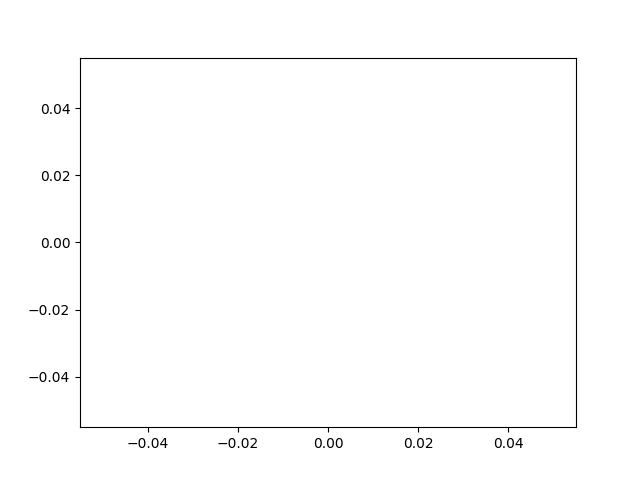

In [6]:
%matplotlib widget

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from random import randrange
from threading import Thread
import time

class LiveGraph:
    def __init__(self):
        self.x_data, self.y_data = [], []
        self.figure = plt.figure()
        self.line, = plt.plot(self.x_data, self.y_data)
        self.animation = FuncAnimation(self.figure, self.update, interval=1000)
        self.th = Thread(target=self.thread_f, daemon=True)
        self.th.start()

    def update(self, frame):
        self.line.set_data(self.x_data, self.y_data)
        self.figure.gca().relim()
        self.figure.gca().autoscale_view()
        return self.line,

    def show(self):
        plt.show()

    def thread_f(self):
        x = 0
        while True:
            self.x_data.append(x)
            x += 1
            self.y_data.append(randrange(0, 100))   
            time.sleep(1)  

g = LiveGraph()
g.show()



In [ ]:
%pip install highlight-text

In [ ]:
%matplotlib widget
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import time
import serial



class LiveGraph:
    def __init__(self):
        self.min_idx = 0
        self.max_idx = 127
        self.ser = serial.Serial(port='/dev/cu.usbserial-110',
                                 baudrate=115200,
                                 parity=serial.PARITY_ODD,
                                 stopbits=serial.STOPBITS_TWO,
                                 bytesize=serial.SEVENBITS,
                                 timeout=2
                                )
        wait = True
        while wait:
            out = self.ser.readline()
            if out == b'LOOP\r\n':
                print("[i] device is ready!")
                wait = False
        self.x_data, self.y_data = [i for i in range(128)], ['0' for i in range(128)]
        self.figure, self.ax = plt.subplots(figsize=(8, 6))
        self.figure.gca().set_ylim([1480, 1520])
        self.line, = self.ax.plot(self.x_data[self.min_idx:self.max_idx], 
                                  self.y_data[self.min_idx:self.max_idx])
        self.annot = self.ax.annotate('StdDev: 0', (0.09, 0.92), xycoords='figure fraction')
        self.animation = FuncAnimation(self.figure, self.update, 
                                       interval=100, frames=None,
                                       cache_frame_data=False,)

    def std_dev(self):
        arr = self.y_data
        n = len(arr)
        c = sum(arr)/n
        s_sq_diff = sum((x-c)**2 for x in arr)
        return s_sq_diff / n

    def a_mean(self):
        return sum(self.y_data) / len(self.y_data)

    def update(self, frame):
    # def update(self):
        minimum_test = 0
        wait = True
        while wait:
            ser_data = self.ser.readline()
            if ser_data == b'LOOP\r\n':
                wait = False
        for i in range(128):
            try:
                y_datum = int(self.ser.readline())
                self.y_data[i] = y_datum
                # if y_datum < (self.y_data[0] - 5) or y_datum > (self.y_data[0] + 5):
                minimum_test += (self.y_data[0] - y_datum)
            except:
                break
        sigma = self.std_dev()
        self.annot.set_text(f'StdDev: {sigma:.2f}\nMin. Count: {minimum_test:.2f}')
        self.line.set_data(self.x_data[self.min_idx:self.max_idx], 
                           self.y_data[self.min_idx:self.max_idx])
        self.figure.canvas.draw()
        return self.line, self.annot,

    def show(self):
        plt.show()
                
g = LiveGraph()
g.show()



[i] device is ready!


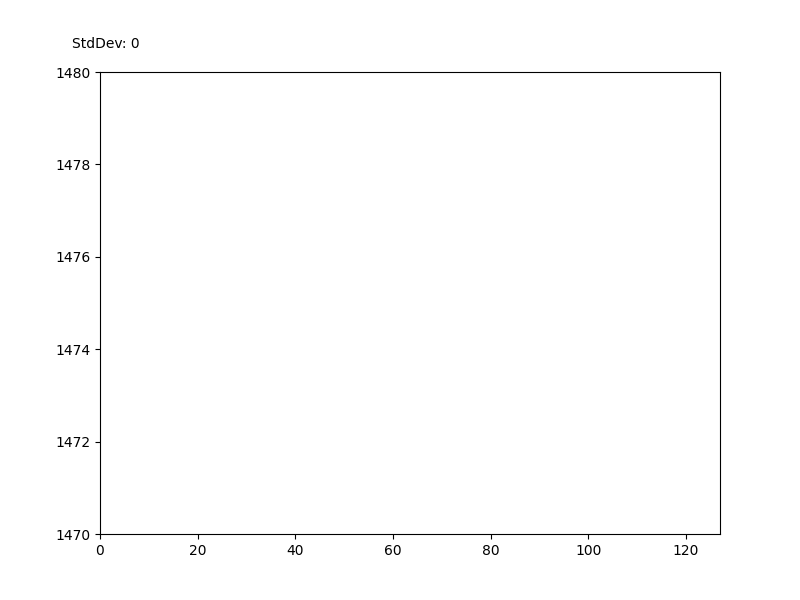

In [2]:
%matplotlib widget
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import time
import serial


class LiveGraph:
    def __init__(self):
        self.min_idx = 0
        self.max_idx = 128   # use 128 so the slice includes index 127

        self.ser = serial.Serial(port='/dev/cu.usbserial-110',
                                 baudrate=115200,
                                 parity=serial.PARITY_ODD,
                                 stopbits=serial.STOPBITS_TWO,
                                 bytesize=serial.SEVENBITS,
                                 timeout=2
                                 )
        # Wait for device
        while True:
            out = self.ser.readline()
            if out == b'LOOP\r\n':
                print("[i] device is ready!")
                break

        # Data for a single line
        self.x_data = [i for i in range(128)]
        self.y_data = [0 for _ in range(128)]

        # History of last 4 lines (each is a list of 128 ints)
        self.history = []

        self.figure, self.ax = plt.subplots(figsize=(8, 6))
        self.ax.set_ylim([1470, 1480])
        self.ax.set_xlim([0, 127]) 

        # Prepare up to 4 line objects
        self.lines = []
        for _ in range(3):
            line, = self.ax.plot([], [])
            self.lines.append(line)

        self.annot = self.ax.annotate(
            'StdDev: 0',
            (0.09, 0.92),
            xycoords='figure fraction'
        )

        self.animation = FuncAnimation(
            self.figure,
            self.update,
            interval=100,
            frames=None,
            cache_frame_data=False,
        )

    def std_dev(self):
        arr = self.y_data
        n = len(arr)
        c = sum(arr) / n
        s_sq_diff = sum((x - c) ** 2 for x in arr)
        return s_sq_diff / n

    def a_mean(self):
        return sum(self.y_data) / len(self.y_data)

    def update(self, frame):
        minimum_test = 0

        # Wait for start-of-frame marker
        while True:
            ser_data = self.ser.readline()
            if ser_data == b'LOOP\r\n':
                break

        # Read 128 values
        for i in range(128):
            try:
                y_datum = int(self.ser.readline())
                self.y_data[i] = y_datum
                minimum_test += (self.y_data[0] - y_datum)
            except Exception:
                break

        # Push this frame into history (keep last 4)
        self.history.append(self.y_data.copy())
        self.history = self.history[-4:]

        # Update stats for current (latest) frame
        sigma = self.std_dev()
        self.annot.set_text(
            f'StdDev: {sigma:.2f}\nMin. Count: {minimum_test:.2f}'
        )

        # x slice (if you later change min_idx / max_idx)
        x_slice = self.x_data[self.min_idx:self.max_idx]

        # Update line objects: oldest history in lines[0], newest in last used line
        for i, line in enumerate(self.lines):
            if i < len(self.history):
                y_slice = self.history[i][self.min_idx:self.max_idx]
                line.set_data(x_slice, y_slice)
                # Optional: make older lines more transparent
                alpha = 0.3 + 0.7 * (i + 1) / len(self.history)
                line.set_alpha(alpha)
            else:
                # Hide unused lines
                line.set_data([], [])

        # No need for explicit canvas.draw(); FuncAnimation handles it
        return (*self.lines, self.annot)

    def show(self):
        plt.show()


g = LiveGraph()
g.show()